In [16]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import joblib
import shap
from catboost import CatBoostClassifier, Pool
import os
from scipy.stats import rankdata
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
path_dir = os.path.dirname(os.getcwd())

merge_parameter='Heart rate (bpm)'
merge_parameter2='Outcome'
i=9
j=1
polydegree=1

In [17]:
def ranking_array(arr):
    ranks = rankdata(arr)
    descending_ranks = len(arr) - ranks + 1
    return descending_ranks

def shap_to_df (model, data):


    BU = pd.DataFrame(data)
    X_data = data.drop(columns=['Outcome'])
    X_data = X_data.drop(columns=['Nr. Ext.'])
    X_data = X_data.drop(columns=['Nr. Int.'])
    X_data = X_data.drop(columns=['CNP'])
    X_data = X_data.drop(columns=['Validation set'])
    X_data = X_data.drop(columns=['Probabilities'])


    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_data)
    shap_values_df = pd.DataFrame(shap_values, columns=X_data.columns)
    shap_values_df2=shap_values_df.abs()
    column_sums = shap_values_df2.sum()
    ranks=ranking_array(column_sums)

    shap_values_df['Nr. Ext.'] = BU['Nr. Ext.']

    return shap_values_df, column_sums, ranks

In [18]:
def polynomial_fit_and_evaluate(x, y, outcome, degree, K, MIN, MAX):
    x = np.array(x)
    y = np.array(y)
    outcome = np.array(outcome)
    nan_indices = np.isnan(x) | np.isnan(y) | np.isnan(outcome)
    x = x[~nan_indices]
    y = y[~nan_indices]
    outcome = outcome[~nan_indices]
    
    coefficients = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coefficients)
    Z = np.linspace(MIN, MAX, K)
    fitted_values = polynomial(Z)

    outcome_percentage = np.zeros_like(Z)
    interval_size = (MAX - MIN) / K

    for i in range(K):
        lower_bound = MIN + i * interval_size
        upper_bound = lower_bound + interval_size
        outcome_in_interval = outcome[(x >= lower_bound) & (x < upper_bound)]
        if len(outcome_in_interval) > 0:
            outcome_percentage[i] = np.mean(outcome_in_interval)
        else:
            outcome_percentage[i] = np.nan

    #print (outcome_percentage)
    return Z, fitted_values , outcome_percentage

### CV cause death time varying SHAP

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


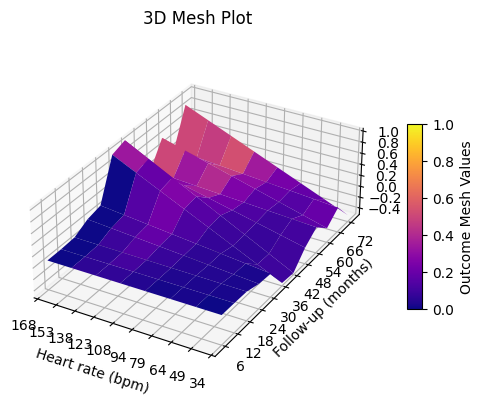

In [19]:
model_05y = joblib.load(os.path.join(path_dir, "cv cause\\0.5y_model.pkl"))
data_05y = pd.read_csv(os.path.join(path_dir, "cv cause\\0.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_05y,column_sums_05y,ranks_05y=shap_to_df (model_05y, data_05y)

model_1y = joblib.load(os.path.join(path_dir, "cv cause\\1y_model.pkl"))
data_1y = pd.read_csv(os.path.join(path_dir, "cv cause\\1y_trainingtesting_validation_dataframe.csv"))
shap_values_df_1y,column_sums_1y,ranks_1y=shap_to_df (model_1y, data_1y)

model_15y = joblib.load(os.path.join(path_dir, "cv cause\\1.5y_model.pkl"))
data_15y = pd.read_csv(os.path.join(path_dir, "cv cause\\1.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_15y,column_sums_15y,ranks_15y=shap_to_df (model_15y, data_15y)

model_2y = joblib.load(os.path.join(path_dir, "cv cause\\2y_model.pkl"))
data_2y = pd.read_csv(os.path.join(path_dir, "cv cause\\2y_trainingtesting_validation_dataframe.csv"))
shap_values_df_2y,column_sums_2y,ranks_2y=shap_to_df (model_2y, data_2y)

model_25y = joblib.load(os.path.join(path_dir, "cv cause\\2.5y_model.pkl"))
data_25y = pd.read_csv(os.path.join(path_dir, "cv cause\\2.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_25y,column_sums_25y,ranks_25y=shap_to_df (model_25y, data_25y)

model_3y = joblib.load(os.path.join(path_dir, "cv cause\\3y_model.pkl"))
data_3y = pd.read_csv(os.path.join(path_dir, "cv cause\\3y_trainingtesting_validation_dataframe.csv"))
shap_values_df_3y,column_sums_3y,ranks_3y=shap_to_df (model_3y, data_3y)

model_35y = joblib.load(os.path.join(path_dir, "cv cause\\3.5y_model.pkl"))
data_35y = pd.read_csv(os.path.join(path_dir, "cv cause\\3.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_35y,column_sums_35y,ranks_35y=shap_to_df (model_35y, data_35y)

model_4y = joblib.load(os.path.join(path_dir, "cv cause\\4y_model.pkl"))
data_4y = pd.read_csv(os.path.join(path_dir, "cv cause\\4y_trainingtesting_validation_dataframe.csv"))
shap_values_df_4y,column_sums_4y,ranks_4y=shap_to_df (model_4y, data_4y)

model_45y = joblib.load(os.path.join(path_dir, "cv cause\\4.5y_model.pkl"))
data_45y = pd.read_csv(os.path.join(path_dir, "cv cause\\4.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_45y,column_sums_45y,ranks_45y=shap_to_df (model_45y, data_45y)

model_5y = joblib.load(os.path.join(path_dir, "cv cause\\5y_model.pkl"))
data_5y = pd.read_csv(os.path.join(path_dir, "cv cause\\5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_5y,column_sums_5y,ranks_5y=shap_to_df (model_5y, data_5y)

model_55y = joblib.load(os.path.join(path_dir, "cv cause\\5.5y_model.pkl"))
data_55y = pd.read_csv(os.path.join(path_dir, "cv cause\\5.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_55y,column_sums_55y,ranks_55y=shap_to_df (model_55y, data_55y)

model_6y = joblib.load(os.path.join(path_dir, "cv cause\\6y_model.pkl"))
data_6y = pd.read_csv(os.path.join(path_dir, "cv cause\\6y_trainingtesting_validation_dataframe.csv"))
shap_values_df_6y,column_sums_6y,ranks_6y=shap_to_df (model_6y, data_6y)

shap_values_df_05y['Nr. Ext.'] = data_05y['Nr. Ext.']
shap_values_df_1y['Nr. Ext.'] = data_1y['Nr. Ext.']
shap_values_df_15y['Nr. Ext.'] = data_15y['Nr. Ext.']
shap_values_df_2y['Nr. Ext.'] = data_2y['Nr. Ext.']
shap_values_df_25y['Nr. Ext.'] = data_25y['Nr. Ext.']
shap_values_df_3y['Nr. Ext.'] = data_3y['Nr. Ext.']
shap_values_df_35y['Nr. Ext.'] = data_35y['Nr. Ext.']
shap_values_df_4y['Nr. Ext.'] = data_4y['Nr. Ext.']
shap_values_df_45y['Nr. Ext.'] = data_45y['Nr. Ext.']
shap_values_df_5y['Nr. Ext.'] = data_5y['Nr. Ext.']
shap_values_df_55y['Nr. Ext.'] = data_55y['Nr. Ext.']
shap_values_df_6y['Nr. Ext.'] = data_6y['Nr. Ext.']

merged_df = shap_values_df_05y[['Nr. Ext.', merge_parameter]].merge(shap_values_df_1y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer',suffixes=('1','2')).merge(shap_values_df_15y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer').merge(shap_values_df_2y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer',suffixes=('3','4')).merge(shap_values_df_25y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer').merge(shap_values_df_3y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer',suffixes=('5','6')).merge(shap_values_df_35y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer').merge(shap_values_df_4y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer',suffixes=('7','8')).merge(shap_values_df_45y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer').merge(shap_values_df_5y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer',suffixes=('9','10')).merge(shap_values_df_55y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer').merge(shap_values_df_6y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer',suffixes=('11','12'))
merged_df[merge_parameter]=data_05y[merge_parameter]
#print(merged_df)

merged_df2 = data_05y[['Nr. Ext.', merge_parameter2]].merge(data_1y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer',suffixes=('1','2')).merge(data_15y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer').merge(data_2y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer',suffixes=('3','4')).merge(data_25y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer').merge(data_3y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer',suffixes=('5','6')).merge(data_35y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer').merge(data_4y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer',suffixes=('7','8')).merge(data_45y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer').merge(data_5y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer',suffixes=('9','10')).merge(data_55y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer').merge(data_6y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer',suffixes=('11','12'))
#print(merged_df2)

name1=merge_parameter+'1'
name2=merge_parameter+'2'
name3=merge_parameter+'3'
name4=merge_parameter+'4'
name5=merge_parameter+'5'
name6=merge_parameter+'6'
name7=merge_parameter+'7'
name8=merge_parameter+'8'
name9=merge_parameter+'9'
name10=merge_parameter+'10'
name11=merge_parameter+'11'
name12=merge_parameter+'12'

outcome1=merge_parameter2+'1'
outcome2=merge_parameter2+'2'
outcome3=merge_parameter2+'3'
outcome4=merge_parameter2+'4'
outcome5=merge_parameter2+'5'
outcome6=merge_parameter2+'6'
outcome7=merge_parameter2+'7'
outcome8=merge_parameter2+'8'
outcome9=merge_parameter2+'9'
outcome10=merge_parameter2+'10'
outcome11=merge_parameter2+'11'
outcome12=merge_parameter2+'12'

max=merged_df[merge_parameter].max()
min=merged_df[merge_parameter].min()
ZZ, fitted_values1, outcome_percentage1=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name1], merged_df2[outcome1] , polydegree, 10, min, max)
_, fitted_values2, outcome_percentage2=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name2], merged_df2[outcome2] , polydegree, 10, min, max)
_, fitted_values3, outcome_percentage3=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name3], merged_df2[outcome3] , polydegree, 10, min, max)
_, fitted_values4, outcome_percentage4=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name4], merged_df2[outcome4] , polydegree, 10, min, max)
_, fitted_values5, outcome_percentage5=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name5], merged_df2[outcome5] , polydegree, 10, min, max)
_, fitted_values6, outcome_percentage6=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name6], merged_df2[outcome6] , polydegree, 10, min, max)
_, fitted_values7, outcome_percentage7=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name7], merged_df2[outcome7] , polydegree, 10, min, max)
_, fitted_values8, outcome_percentage8=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name8], merged_df2[outcome8] , polydegree, 10, min, max)
_, fitted_values9, outcome_percentage9=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name9], merged_df2[outcome9] , polydegree, 10, min, max)
_, fitted_values10, outcome_percentage10=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name10], merged_df2[outcome10] , polydegree, 10, min, max)
_, fitted_values11, outcome_percentage11=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name11], merged_df2[outcome11] , polydegree, 10, min, max)
_, fitted_values12, outcome_percentage12=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name12], merged_df2[outcome12] , polydegree, 10, min, max)

outcome_data = {
    'x_values': ZZ,
    'label': [6,12,18,24,30,36,42,48,54,60,66,72],
    'value_1': outcome_percentage1,
    'value_2': outcome_percentage2,
    'value_3': outcome_percentage3,
    'value_4': outcome_percentage4,
    'value_5': outcome_percentage5,
    'value_6': outcome_percentage6,
    'value_7': outcome_percentage7,
    'value_8': outcome_percentage8,
    'value_9': outcome_percentage9,
    'value_10': outcome_percentage10,
    'value_11': outcome_percentage11,
    'value_12': outcome_percentage12,
}

mesh_data = {
    'x_values': ZZ,
    'label': [6,12,18,24,30,36,42,48,54,60,66,72],
    'value_1': fitted_values1,
    'value_2': fitted_values2,
    'value_3': fitted_values3,
    'value_4': fitted_values4,
    'value_5': fitted_values5,
    'value_6': fitted_values6,
    'value_7': fitted_values7,
    'value_8': fitted_values8,
    'value_9': fitted_values9,
    'value_10': fitted_values10,
    'value_11': fitted_values11,
    'value_12': fitted_values12,
}

outcome_mesh = np.column_stack([outcome_data[f'value_{i}'] for i in range(1, 13)])  

# Prepare data for 3D plotting
x = mesh_data['x_values'] #inversing
#x = mesh_data['x_values'] #not inversing
y = mesh_data['label']
z = np.column_stack([mesh_data[f'value_{i}'] for i in range(1, 13)])  # Convert values to 2D numpy array

# Create the 3D mesh plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_data, y_data = np.meshgrid(x, y)
z_data = z.T
outcome_mesh=outcome_mesh.T

# Plot the surface and set the facecolors to 'outcome_mesh'
surf = ax.plot_surface(x_data[:, j:i], y_data[:, j:i], z_data[:, j:i], linewidth=0,facecolors=plt.cm.plasma(outcome_mesh[:, j:i]), cmap='plasma', alpha=1)

ax.xaxis.set_major_locator(LinearLocator(10))
ax.xaxis.set_major_formatter('{x:.00f}')
ax.invert_xaxis()
ax.set_xlim (x_data[:, j:i].max(),x_data[:, j:i].min())

from matplotlib.ticker import FixedLocator

ax.yaxis.set_major_locator(FixedLocator([6,12,18,24,30,36,42,48,54,60,66,72]))
ax.yaxis.set_major_formatter('{x:.00f}')

#ax.zaxis.set_major_locator(LinearLocator(5))
#ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_box_aspect([2,3,1]) 


# Customize the plot
ax.set_xlabel(merge_parameter)
ax.set_ylabel('Follow-up (months)')
ax.set_zlabel('Values')
ax.set_title('3D Mesh Plot')

# Add a colorbar for the 'outcome_mesh'
cb = plt.colorbar(surf, shrink=0.5, aspect=12)
cb.set_label('Outcome Mesh Values')
cb.set_ticks(cb.get_ticks())

plt.show()

### All cause death time varying SHAP

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


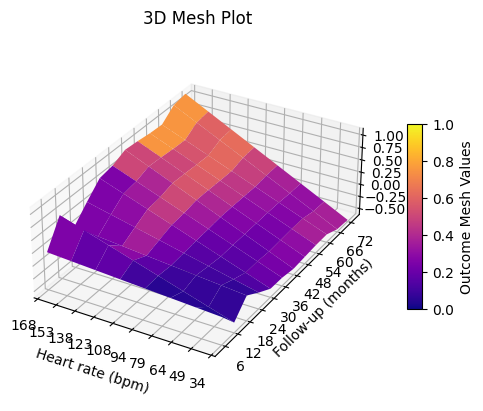

In [20]:
model_05y = joblib.load(os.path.join(path_dir, "all cause\\0.5y_model.pkl"))
data_05y = pd.read_csv(os.path.join(path_dir, "all cause\\0.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_05y,column_sums_05y,ranks_05y=shap_to_df (model_05y, data_05y)

model_1y = joblib.load(os.path.join(path_dir, "all cause\\1y_model.pkl"))
data_1y = pd.read_csv(os.path.join(path_dir, "all cause\\1y_trainingtesting_validation_dataframe.csv"))
shap_values_df_1y,column_sums_1y,ranks_1y=shap_to_df (model_1y, data_1y)

model_15y = joblib.load(os.path.join(path_dir, "all cause\\1.5y_model.pkl"))
data_15y = pd.read_csv(os.path.join(path_dir, "all cause\\1.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_15y,column_sums_15y,ranks_15y=shap_to_df (model_15y, data_15y)

model_2y = joblib.load(os.path.join(path_dir, "all cause\\2y_model.pkl"))
data_2y = pd.read_csv(os.path.join(path_dir, "all cause\\2y_trainingtesting_validation_dataframe.csv"))
shap_values_df_2y,column_sums_2y,ranks_2y=shap_to_df (model_2y, data_2y)

model_25y = joblib.load(os.path.join(path_dir, "all cause\\2.5y_model.pkl"))
data_25y = pd.read_csv(os.path.join(path_dir, "all cause\\2.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_25y,column_sums_25y,ranks_25y=shap_to_df (model_25y, data_25y)

model_3y = joblib.load(os.path.join(path_dir, "all cause\\3y_model.pkl"))
data_3y = pd.read_csv(os.path.join(path_dir, "all cause\\3y_trainingtesting_validation_dataframe.csv"))
shap_values_df_3y,column_sums_3y,ranks_3y=shap_to_df (model_3y, data_3y)

model_35y = joblib.load(os.path.join(path_dir, "all cause\\3.5y_model.pkl"))
data_35y = pd.read_csv(os.path.join(path_dir, "all cause\\3.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_35y,column_sums_35y,ranks_35y=shap_to_df (model_35y, data_35y)

model_4y = joblib.load(os.path.join(path_dir, "all cause\\4y_model.pkl"))
data_4y = pd.read_csv(os.path.join(path_dir, "all cause\\4y_trainingtesting_validation_dataframe.csv"))
shap_values_df_4y,column_sums_4y,ranks_4y=shap_to_df (model_4y, data_4y)

model_45y = joblib.load(os.path.join(path_dir, "all cause\\4.5y_model.pkl"))
data_45y = pd.read_csv(os.path.join(path_dir, "all cause\\4.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_45y,column_sums_45y,ranks_45y=shap_to_df (model_45y, data_45y)

model_5y = joblib.load(os.path.join(path_dir, "all cause\\5y_model.pkl"))
data_5y = pd.read_csv(os.path.join(path_dir, "all cause\\5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_5y,column_sums_5y,ranks_5y=shap_to_df (model_5y, data_5y)

model_55y = joblib.load(os.path.join(path_dir, "all cause\\5.5y_model.pkl"))
data_55y = pd.read_csv(os.path.join(path_dir, "all cause\\5.5y_trainingtesting_validation_dataframe.csv"))
shap_values_df_55y,column_sums_55y,ranks_55y=shap_to_df (model_55y, data_55y)

model_6y = joblib.load(os.path.join(path_dir, "all cause\\6y_model.pkl"))
data_6y = pd.read_csv(os.path.join(path_dir, "all cause\\6y_trainingtesting_validation_dataframe.csv"))
shap_values_df_6y,column_sums_6y,ranks_6y=shap_to_df (model_6y, data_6y)

shap_values_df_05y['Nr. Ext.'] = data_05y['Nr. Ext.']
shap_values_df_1y['Nr. Ext.'] = data_1y['Nr. Ext.']
shap_values_df_15y['Nr. Ext.'] = data_15y['Nr. Ext.']
shap_values_df_2y['Nr. Ext.'] = data_2y['Nr. Ext.']
shap_values_df_25y['Nr. Ext.'] = data_25y['Nr. Ext.']
shap_values_df_3y['Nr. Ext.'] = data_3y['Nr. Ext.']
shap_values_df_35y['Nr. Ext.'] = data_35y['Nr. Ext.']
shap_values_df_4y['Nr. Ext.'] = data_4y['Nr. Ext.']
shap_values_df_45y['Nr. Ext.'] = data_45y['Nr. Ext.']
shap_values_df_5y['Nr. Ext.'] = data_5y['Nr. Ext.']
shap_values_df_55y['Nr. Ext.'] = data_55y['Nr. Ext.']
shap_values_df_6y['Nr. Ext.'] = data_6y['Nr. Ext.']

merged_df = shap_values_df_05y[['Nr. Ext.', merge_parameter]].merge(shap_values_df_1y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer',suffixes=('1','2')).merge(shap_values_df_15y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer').merge(shap_values_df_2y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer',suffixes=('3','4')).merge(shap_values_df_25y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer').merge(shap_values_df_3y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer',suffixes=('5','6')).merge(shap_values_df_35y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer').merge(shap_values_df_4y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer',suffixes=('7','8')).merge(shap_values_df_45y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer').merge(shap_values_df_5y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer',suffixes=('9','10')).merge(shap_values_df_55y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer').merge(shap_values_df_6y[['Nr. Ext.', merge_parameter]], on='Nr. Ext.', how='outer',suffixes=('11','12'))
merged_df[merge_parameter]=data_05y[merge_parameter]
#print(merged_df)

merged_df2 = data_05y[['Nr. Ext.', merge_parameter2]].merge(data_1y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer',suffixes=('1','2')).merge(data_15y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer').merge(data_2y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer',suffixes=('3','4')).merge(data_25y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer').merge(data_3y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer',suffixes=('5','6')).merge(data_35y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer').merge(data_4y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer',suffixes=('7','8')).merge(data_45y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer').merge(data_5y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer',suffixes=('9','10')).merge(data_55y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer').merge(data_6y[['Nr. Ext.', merge_parameter2]], on='Nr. Ext.', how='outer',suffixes=('11','12'))
#print(merged_df2)

name1=merge_parameter+'1'
name2=merge_parameter+'2'
name3=merge_parameter+'3'
name4=merge_parameter+'4'
name5=merge_parameter+'5'
name6=merge_parameter+'6'
name7=merge_parameter+'7'
name8=merge_parameter+'8'
name9=merge_parameter+'9'
name10=merge_parameter+'10'
name11=merge_parameter+'11'
name12=merge_parameter+'12'

outcome1=merge_parameter2+'1'
outcome2=merge_parameter2+'2'
outcome3=merge_parameter2+'3'
outcome4=merge_parameter2+'4'
outcome5=merge_parameter2+'5'
outcome6=merge_parameter2+'6'
outcome7=merge_parameter2+'7'
outcome8=merge_parameter2+'8'
outcome9=merge_parameter2+'9'
outcome10=merge_parameter2+'10'
outcome11=merge_parameter2+'11'
outcome12=merge_parameter2+'12'

max=merged_df[merge_parameter].max()
min=merged_df[merge_parameter].min()
ZZ, fitted_values1, outcome_percentage1=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name1], merged_df2[outcome1] , polydegree, 10, min, max)
_, fitted_values2, outcome_percentage2=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name2], merged_df2[outcome2] , polydegree, 10, min, max)
_, fitted_values3, outcome_percentage3=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name3], merged_df2[outcome3] , polydegree, 10, min, max)
_, fitted_values4, outcome_percentage4=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name4], merged_df2[outcome4] , polydegree, 10, min, max)
_, fitted_values5, outcome_percentage5=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name5], merged_df2[outcome5] , polydegree, 10, min, max)
_, fitted_values6, outcome_percentage6=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name6], merged_df2[outcome6] , polydegree, 10, min, max)
_, fitted_values7, outcome_percentage7=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name7], merged_df2[outcome7] , polydegree, 10, min, max)
_, fitted_values8, outcome_percentage8=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name8], merged_df2[outcome8] , polydegree, 10, min, max)
_, fitted_values9, outcome_percentage9=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name9], merged_df2[outcome9] , polydegree, 10, min, max)
_, fitted_values10, outcome_percentage10=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name10], merged_df2[outcome10] , polydegree, 10, min, max)
_, fitted_values11, outcome_percentage11=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name11], merged_df2[outcome11] , polydegree, 10, min, max)
_, fitted_values12, outcome_percentage12=polynomial_fit_and_evaluate(merged_df[merge_parameter], merged_df[name12], merged_df2[outcome12] , polydegree, 10, min, max)

outcome_data = {
    'x_values': ZZ,
    'label': [6,12,18,24,30,36,42,48,54,60,66,72],
    'value_1': outcome_percentage1,
    'value_2': outcome_percentage2,
    'value_3': outcome_percentage3,
    'value_4': outcome_percentage4,
    'value_5': outcome_percentage5,
    'value_6': outcome_percentage6,
    'value_7': outcome_percentage7,
    'value_8': outcome_percentage8,
    'value_9': outcome_percentage9,
    'value_10': outcome_percentage10,
    'value_11': outcome_percentage11,
    'value_12': outcome_percentage12,
}

mesh_data = {
    'x_values': ZZ,
    'label': [6,12,18,24,30,36,42,48,54,60,66,72],
    'value_1': fitted_values1,
    'value_2': fitted_values2,
    'value_3': fitted_values3,
    'value_4': fitted_values4,
    'value_5': fitted_values5,
    'value_6': fitted_values6,
    'value_7': fitted_values7,
    'value_8': fitted_values8,
    'value_9': fitted_values9,
    'value_10': fitted_values10,
    'value_11': fitted_values11,
    'value_12': fitted_values12,
}

outcome_mesh = np.column_stack([outcome_data[f'value_{i}'] for i in range(1, 13)])  

# Prepare data for 3D plotting
x = mesh_data['x_values'] #inversing
#x = mesh_data['x_values'] #not inversing
y = mesh_data['label']
z = np.column_stack([mesh_data[f'value_{i}'] for i in range(1, 13)])  # Convert values to 2D numpy array

# Create the 3D mesh plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_data, y_data = np.meshgrid(x, y)
z_data = z.T
outcome_mesh=outcome_mesh.T

# Plot the surface and set the facecolors to 'outcome_mesh'
surf = ax.plot_surface(x_data[:, j:i], y_data[:, j:i], z_data[:, j:i], linewidth=0,facecolors=plt.cm.plasma(outcome_mesh[:, j:i]), cmap='plasma', alpha=1)

ax.xaxis.set_major_locator(LinearLocator(10))
ax.xaxis.set_major_formatter('{x:.00f}')
ax.invert_xaxis()
ax.set_xlim (x_data[:, j:i].max(),x_data[:, j:i].min())

from matplotlib.ticker import FixedLocator

ax.yaxis.set_major_locator(FixedLocator([6,12,18,24,30,36,42,48,54,60,66,72]))
ax.yaxis.set_major_formatter('{x:.00f}')

#ax.zaxis.set_major_locator(LinearLocator(5))
#ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_box_aspect([2,3,1]) 


# Customize the plot
ax.set_xlabel(merge_parameter)
ax.set_ylabel('Follow-up (months)')
ax.set_zlabel('Values')
ax.set_title('3D Mesh Plot')

# Add a colorbar for the 'outcome_mesh'
cb = plt.colorbar(surf, shrink=0.5, aspect=12)
cb.set_label('Outcome Mesh Values')
cb.set_ticks(cb.get_ticks())

plt.show()